### Spearman correlation matrix for candidates of interest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dir_path = '..//data//results_summary//'

total_voters_processed = 56962688

#### cand_id assigned (by me) to particular candidates

Admin slate: 35, 26, 22, 25, 34, 7, 36, 50, 24, 6

Duterten: 30, 27, 28, 31, 32, 60, 54, 63, 64, 29

Imee: 20

Villar: 21

Bam: 4

Kiko: 8

In [3]:
### Vote data
nat_df = pd.read_csv(os.path.join(dir_path,'national.csv'))
reg_df = pd.read_csv(os.path.join(dir_path,'regional.csv'))
prv_df = pd.read_csv(os.path.join(dir_path,'provincial.csv'))
cty_df = pd.read_csv(os.path.join(dir_path,'city.csv'))

### Context details
sen_det_df = pd.read_csv(os.path.join(dir_path,'sen_details.csv'))
reg_det_df = pd.read_csv(os.path.join(dir_path,'region_details.csv'))
prv_det_df = pd.read_csv(os.path.join(dir_path,'province_details.csv'))
cty_det_df = pd.read_csv(os.path.join(dir_path,'city_details.csv'))

In [4]:
### Getting Top 24 candidates and subsetting city-level votes data for Top 24 candidates
top24 = nat_df.sort_values('vote_count',ascending=False).head(24)['cand_id'].values
top24_names = [sen_det_df.loc[sen_det_df['cand_id']==x,'name'].values[0] for x in top24]
cty_df_24 = cty_df.loc[cty_df['cand_id'].isin(top24)]

In [5]:
### Merging of vote data with city details (for total voters processed column) and computation of vote percentages
merged_cty = cty_df_24.merge(cty_det_df[['cty_id','total_voters_processed']],on='cty_id',how='left')
merged_cty['perc_votes'] = merged_cty['vote_count']/merged_cty['total_voters_processed']

In [6]:
# Pivoting (to have cities as rows and candidates as columns)
pivot_cty = merged_cty.pivot(columns='cand_id',index='cty_id',values='perc_votes')[top24]
corr_table = pivot_cty.corr(method='spearman').values

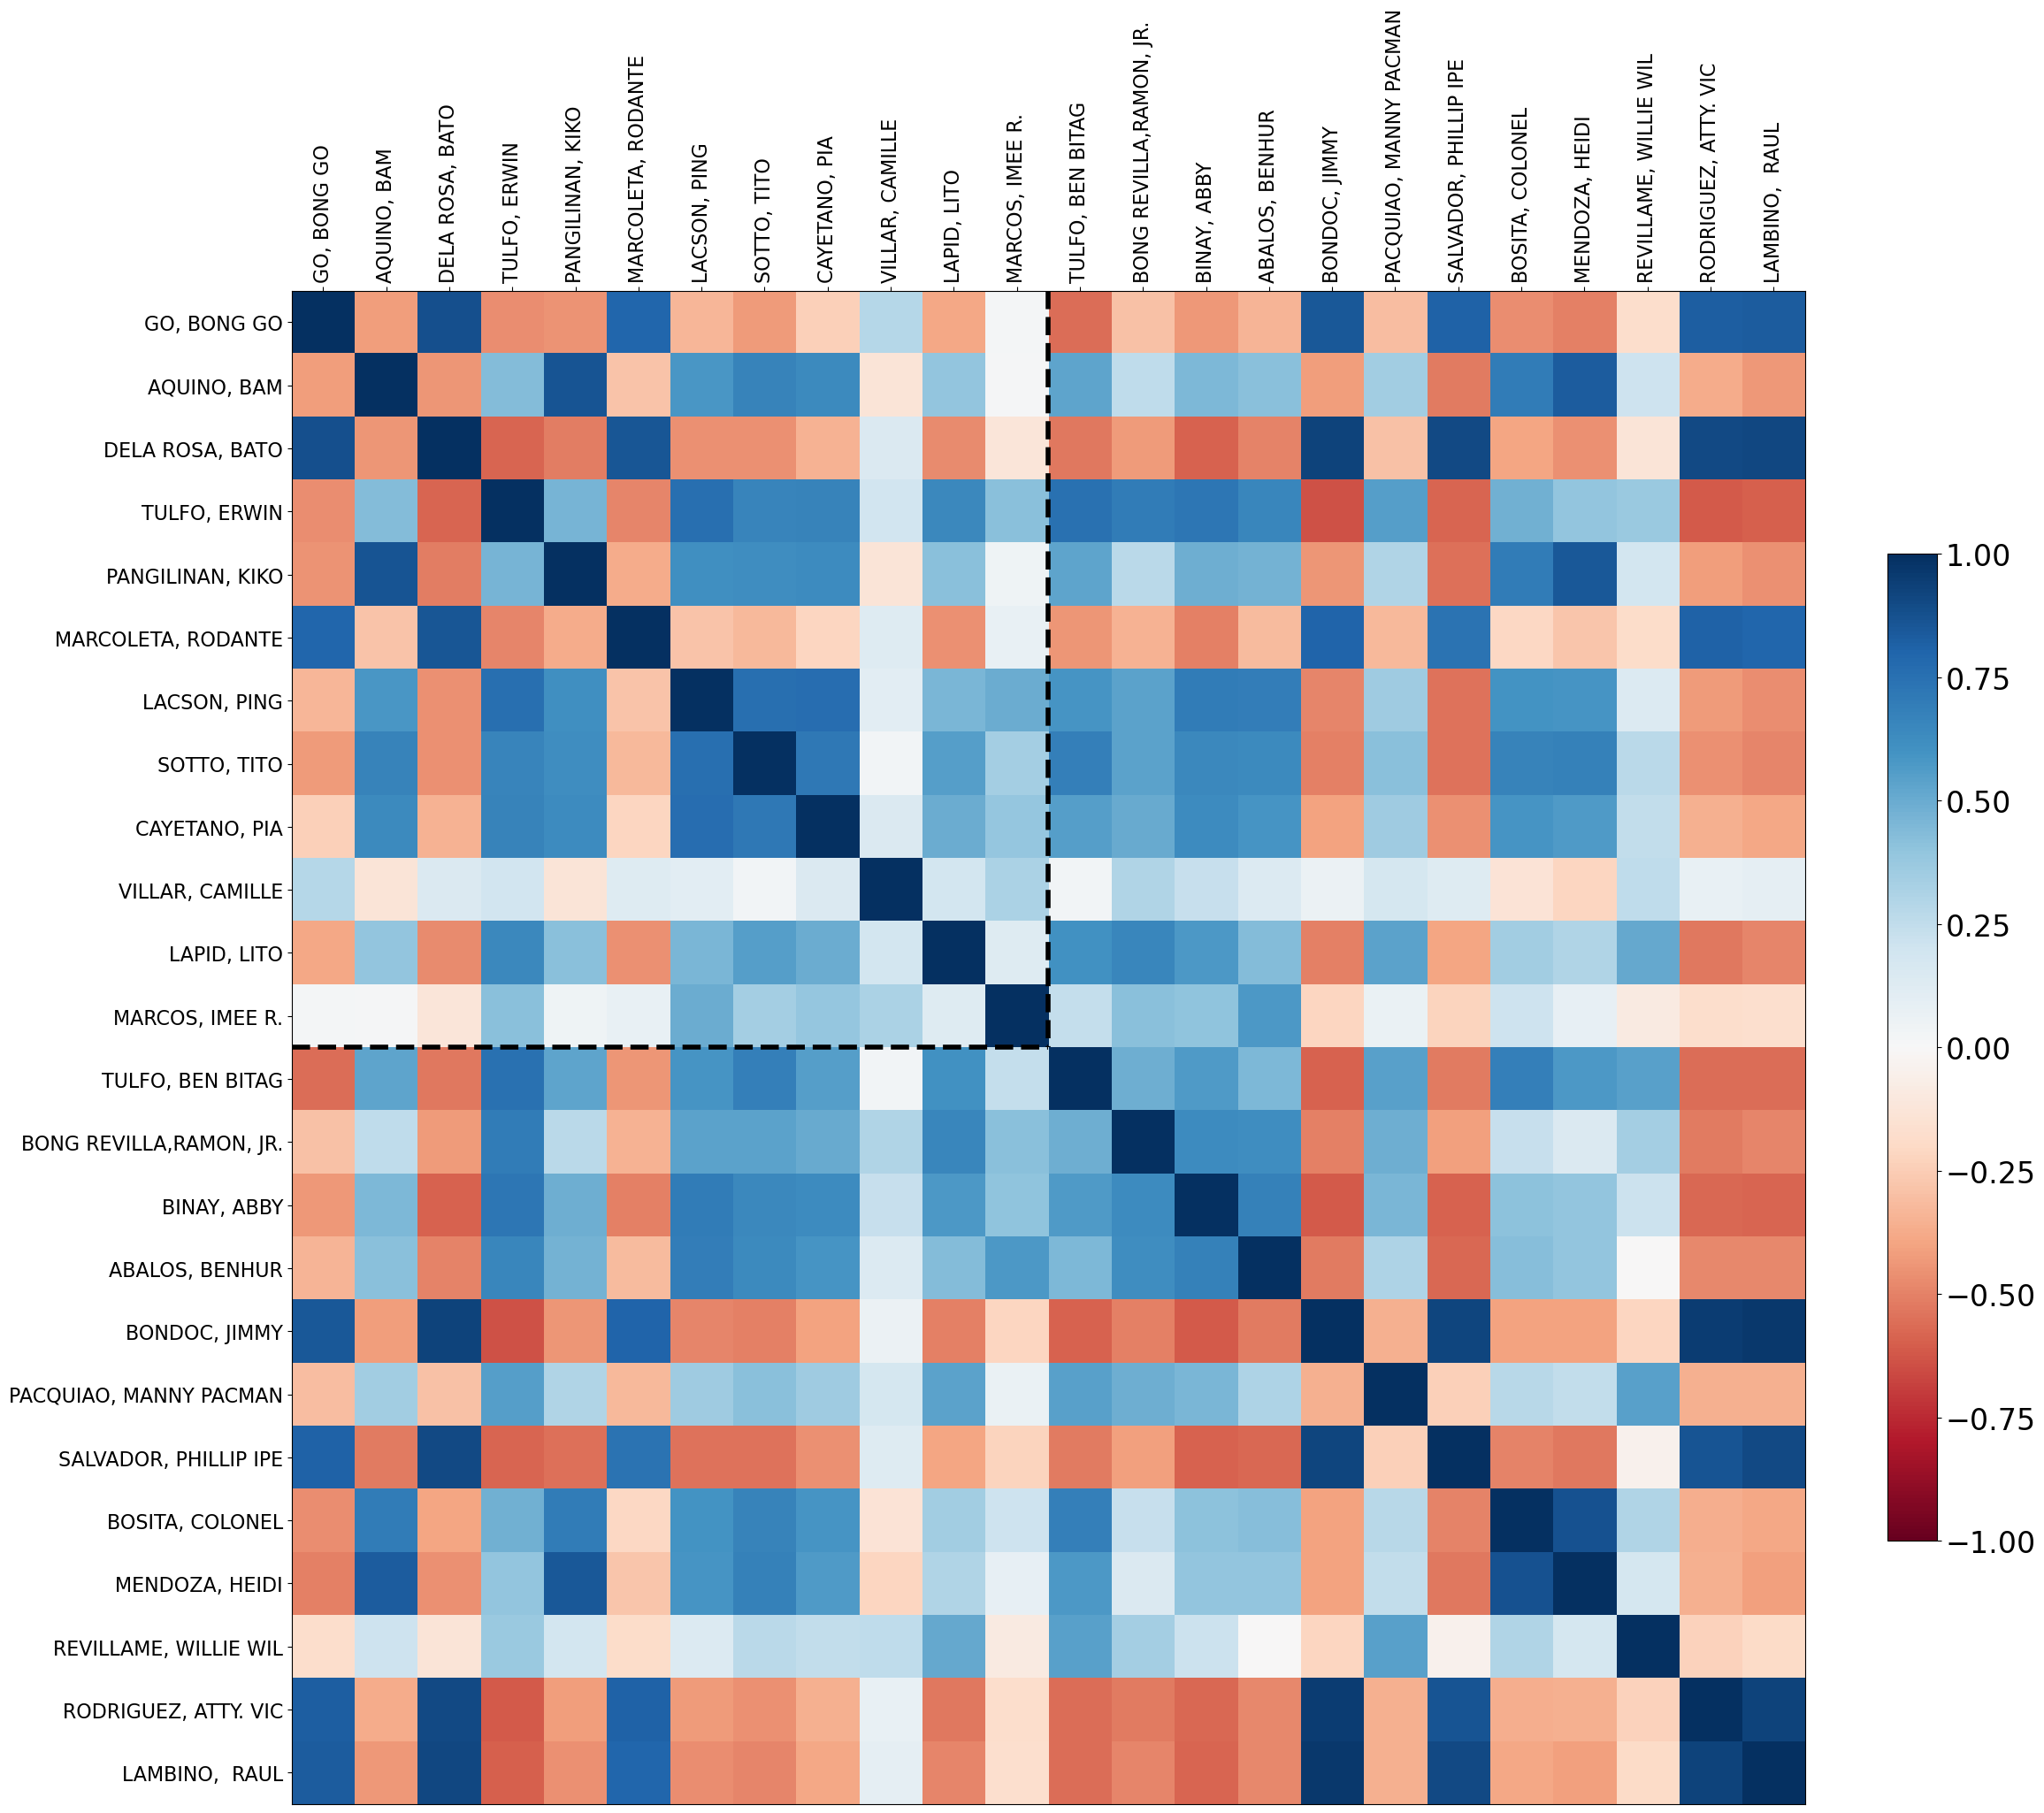

In [7]:
top24_names_cl = [x.split("(")[0].strip() for x in top24_names]

fig,ax = plt.subplots(figsize=(24,24))

im = ax.imshow(corr_table,vmin=-1,vmax=1,cmap='RdBu')
ax.set_xticks(range(24),top24_names_cl,rotation=90,fontsize=16)
ax.xaxis.tick_top()

ax.set_yticks(range(24),top24_names_cl,fontsize=16)

cbar = plt.colorbar(im,fraction=0.03,ax=ax)
cbar.ax.tick_params(labelsize=24)

ax.plot([-0.5,11.5],[11.5,11.5],c='k',linewidth=4,linestyle='--')
ax.plot([11.5,11.5],[-0.5,11.5],c='k',linewidth=4,linestyle='--')

fig.savefig("..//plots//corr_matrix_top24.png")
plt.show()

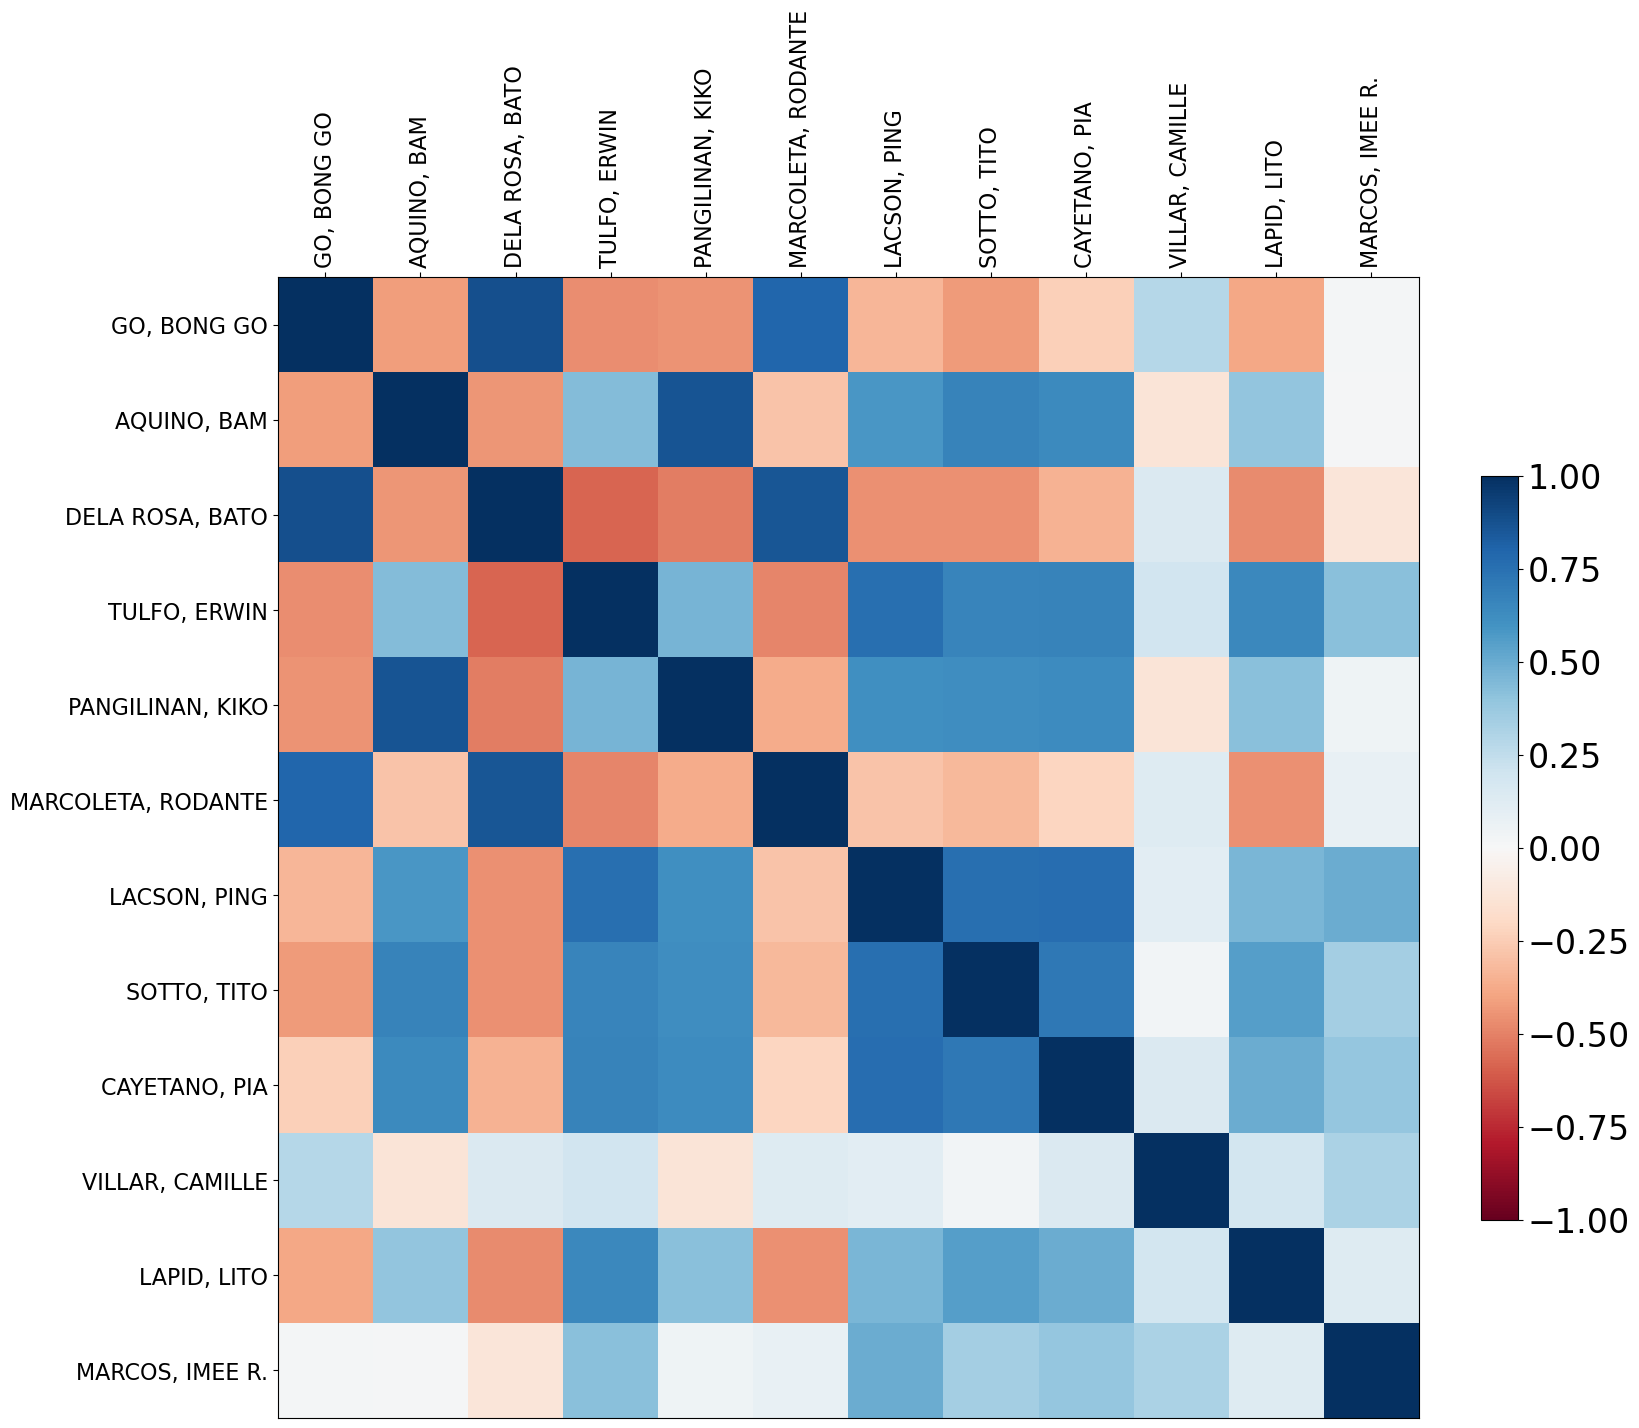

In [8]:
top12_names_cl = [x.split("(")[0].strip() for x in top24_names[:12]]

fig,ax = plt.subplots(figsize=(16,16))

im = ax.imshow(corr_table[:12,:12],vmin=-1,vmax=1,cmap='RdBu')
ax.set_xticks(range(12),top12_names_cl,rotation=90,fontsize=16)
ax.xaxis.tick_top()

ax.set_yticks(range(12),top12_names_cl,fontsize=16)

cbar = plt.colorbar(im,fraction=0.03,ax=ax)
cbar.ax.tick_params(labelsize=24)

fig.savefig("..//plots//corr_matrix_top12.png")
plt.show()

## Duter10

In [9]:
duter10_ids= [30, 27, 28, 31, 32, 60, 54, 63, 64, 29, 20, 21]
duter10_names = [sen_det_df.loc[sen_det_df['cand_id']==x,'name'].values[0] for x in duter10_ids]

cty_df_duter10 = cty_df.loc[cty_df['cand_id'].isin(duter10_ids)]

merged_cty_duter10 = cty_df_duter10.merge(cty_det_df[['cty_id','total_voters_processed']],on='cty_id',how='left')
merged_cty_duter10['perc_votes'] = merged_cty_duter10['vote_count']/merged_cty_duter10['total_voters_processed']

pivot_cty_duter10 = merged_cty_duter10.pivot(columns='cand_id',index='cty_id',values='perc_votes')[duter10_ids]
corr_table_duter10 = pivot_cty_duter10.corr(method='spearman').values

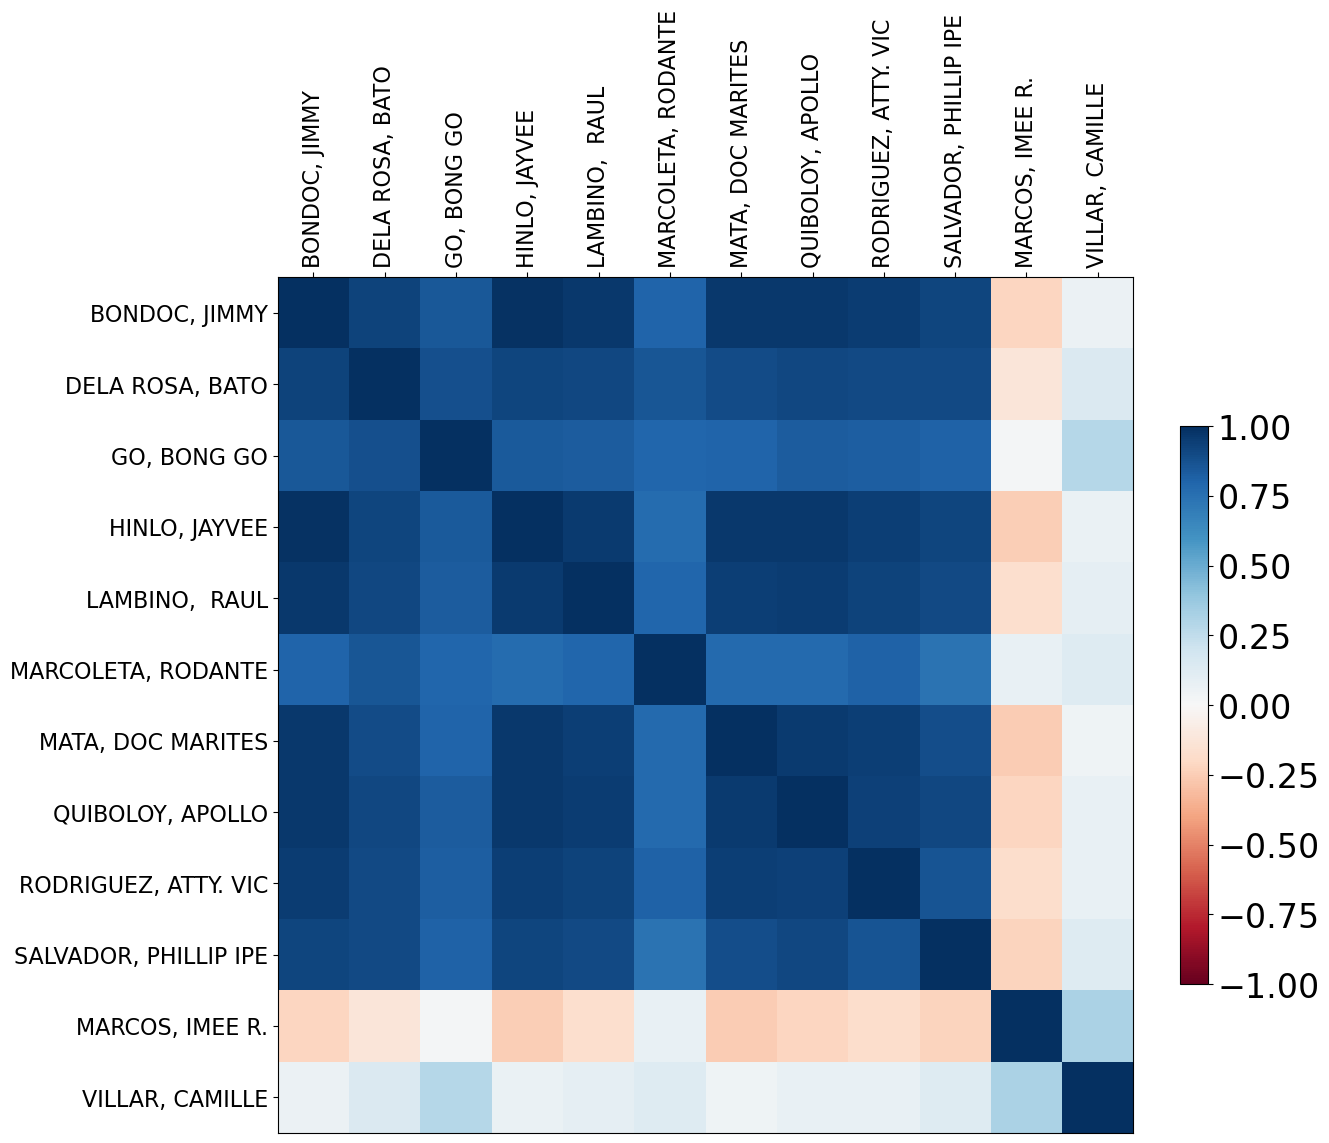

In [10]:
duter10_names_cl = [x.split("(")[0].strip() for x in duter10_names]

fig,ax = plt.subplots(figsize=(12,12))

im = ax.imshow(corr_table_duter10,vmin=-1,vmax=1,cmap='RdBu')
ax.set_xticks(range(12),duter10_names_cl,rotation=90,fontsize=16)
ax.xaxis.tick_top()

ax.set_yticks(range(12),duter10_names_cl,fontsize=16)

cbar = plt.colorbar(im,fraction=0.03,ax=ax)
cbar.ax.tick_params(labelsize=24)

fig.savefig("..//plots//corr_matrix_duter10.png")
plt.show()

## Admin

In [11]:
admin_ids= [35, 26, 22, 25, 34, 7, 36, 50, 24, 6, 20, 21]
admin_names = [sen_det_df.loc[sen_det_df['cand_id']==x,'name'].values[0] for x in admin_ids]

cty_df_admin = cty_df.loc[cty_df['cand_id'].isin(admin_ids)]

merged_cty_admin = cty_df_admin.merge(cty_det_df[['cty_id','total_voters_processed']],on='cty_id',how='left')
merged_cty_admin['perc_votes'] = merged_cty_admin['vote_count']/merged_cty_admin['total_voters_processed']

pivot_cty_admin = merged_cty_admin.pivot(columns='cand_id',index='cty_id',values='perc_votes')[admin_ids]
corr_table_admin = pivot_cty_admin.corr(method='spearman').values

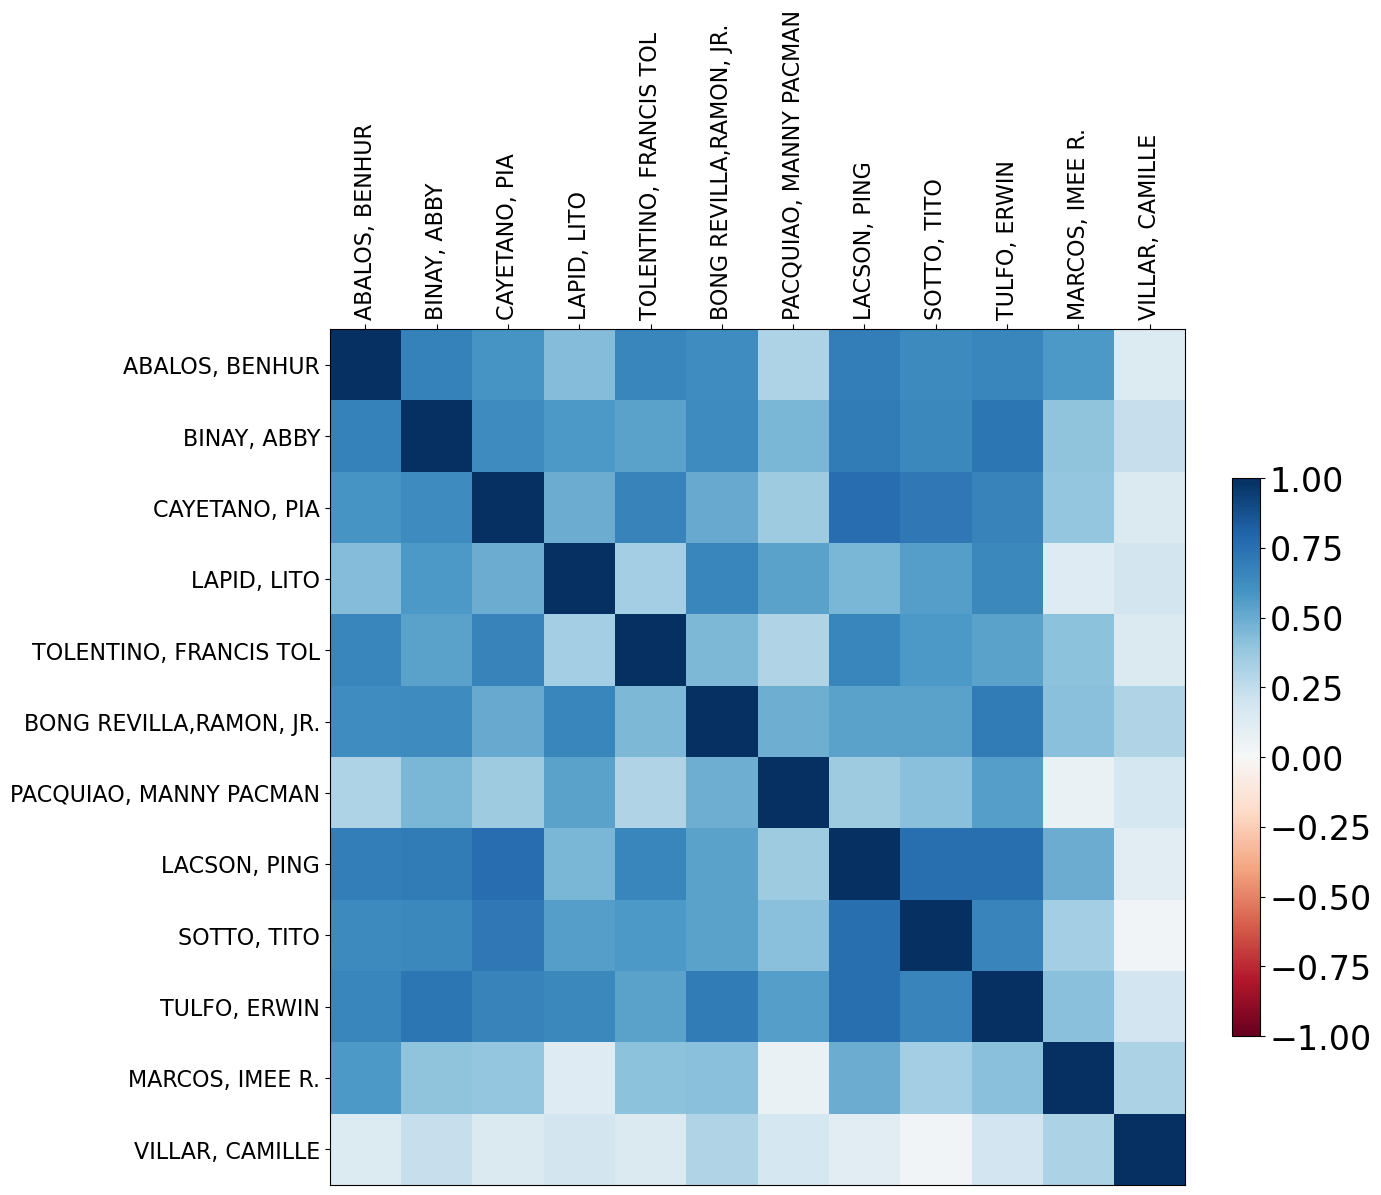

In [12]:
admin_names_cl = [x.split("(")[0].strip() for x in admin_names]

fig,ax = plt.subplots(figsize=(12,12))

im = ax.imshow(corr_table_admin,vmin=-1,vmax=1,cmap='RdBu')
ax.set_xticks(range(12),admin_names_cl,rotation=90,fontsize=16)
ax.xaxis.tick_top()

ax.set_yticks(range(12),admin_names_cl,fontsize=16)

cbar = plt.colorbar(im,fraction=0.03,ax=ax)
cbar.ax.tick_params(labelsize=24)

fig.savefig("..//plots//corr_matrix_admin.png")
plt.show()